## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [ ]:
# Name: <Nishant Agarwal>
# Email: <niagarwa@eng.ucsd.edu>
# PID: <A53104152>

In [34]:
%pylab inline
data_dir = "./Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [ ]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

### Get the statistics from the Pickle File

In [2]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))
# STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))


In [3]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [4]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [8]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000


grep: '../Data/Weather/ghcnd-readme.txt': No such file or directory


mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000


grep: '../Data/Weather/ghcnd-readme.txt': No such file or directory


mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000


grep: '../Data/Weather/ghcnd-readme.txt': No such file or directory


mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000


grep: '../Data/Weather/ghcnd-readme.txt': No such file or directory


mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000


grep: '../Data/Weather/ghcnd-readme.txt': No such file or directory
grep: '../Data/Weather/ghcnd-readme.txt': No such file or directory


mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


### Script for plotting yearly plots 

In [26]:
def YearlyPlots(T,ttl='', yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

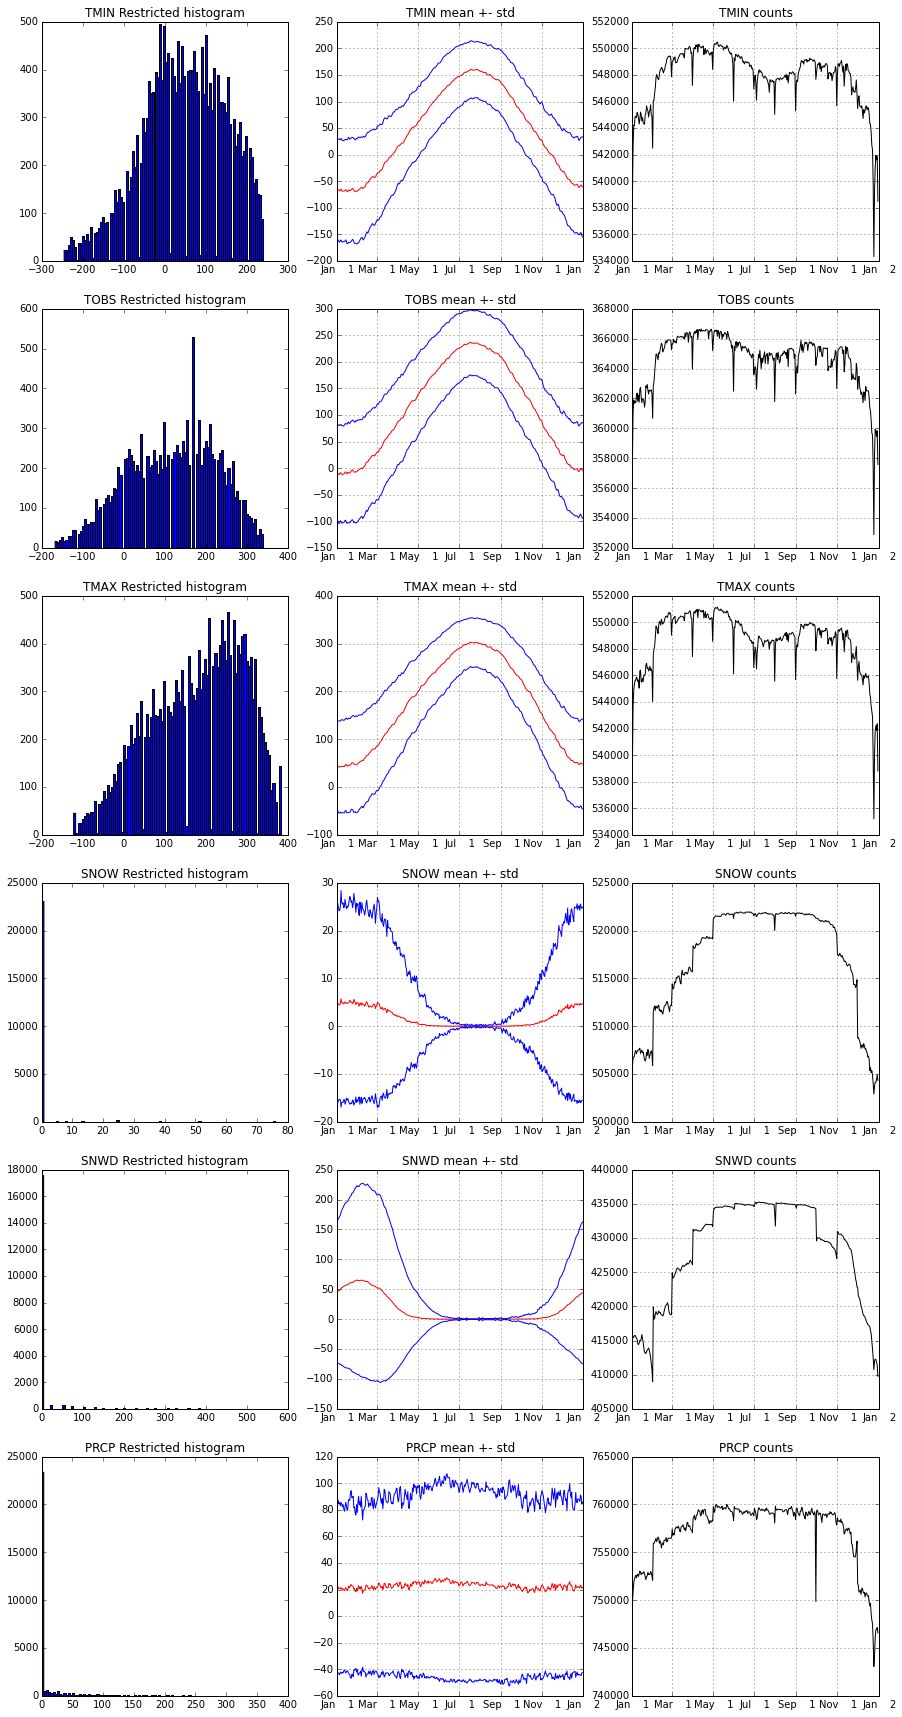

In [35]:
import numpy as np
import matplotlib.pyplot as plt
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for Histogram
    
    low = STAT[meas]['low100']
    high = STAT[meas]['high100']
    Vals=filter(lambda x: x>=low and x<=high ,STAT[meas]['SortedVals'])
    plt.hist(Vals, 100, facecolor = 'blue')
    plt.title(meas + " Restricted histogram")
    subplot(6,3,offset)
    offset+=1

    ## Your code for mean and mean +- std
    T1=STAT[meas]['Mean']
    std=np.sqrt(STAT[meas]['Var'])
#     print(STAT[meas]['eigval'])
    YearlyPlots(T1, x=(1,366), c='r')
    YearlyPlots(T1+ std,c='b')
    YearlyPlots(T1 - std, meas + " mean +- std",c='b')
    subplot(6,3,offset)
    offset+=1
    ## Your code for number of measurements
    T=STAT[meas]['NE']
    YearlyPlots(T, meas + " counts", x=(1,366), c='k')

### Plot the Number of measurements recorded each day for TMAX

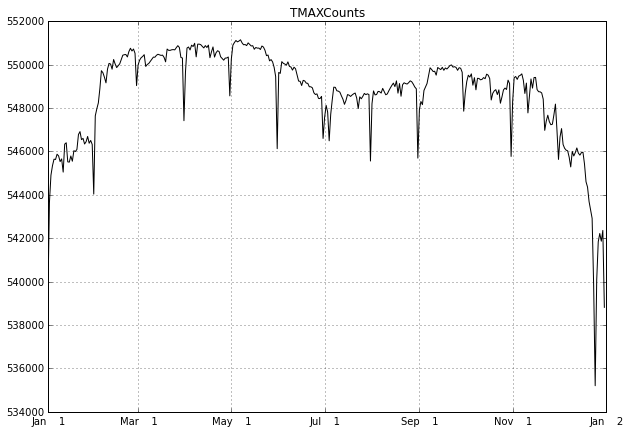

In [32]:
## Your code here
T=STAT['TMAX']['NE']
YearlyPlots(T, 'TMAX' + "Counts", x=(1,366),c='k')

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


1. At the end and beginning of the year, the counts are low because it is the time of winter holidays and most of the officials would be on leave during that time. At the end of each month, maybe, the service stations do maintainence work of the instruments and hence, they do not record many readings.
We can find the stations that do not record readings during those times and remove them from computations
2. The number of counts in winters are lesser as compared in summer because, the snow depth measuring instruments might be installed in remote areas and hence those readings might not be taken daily because of their inaccessibility in heavy snow.


### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

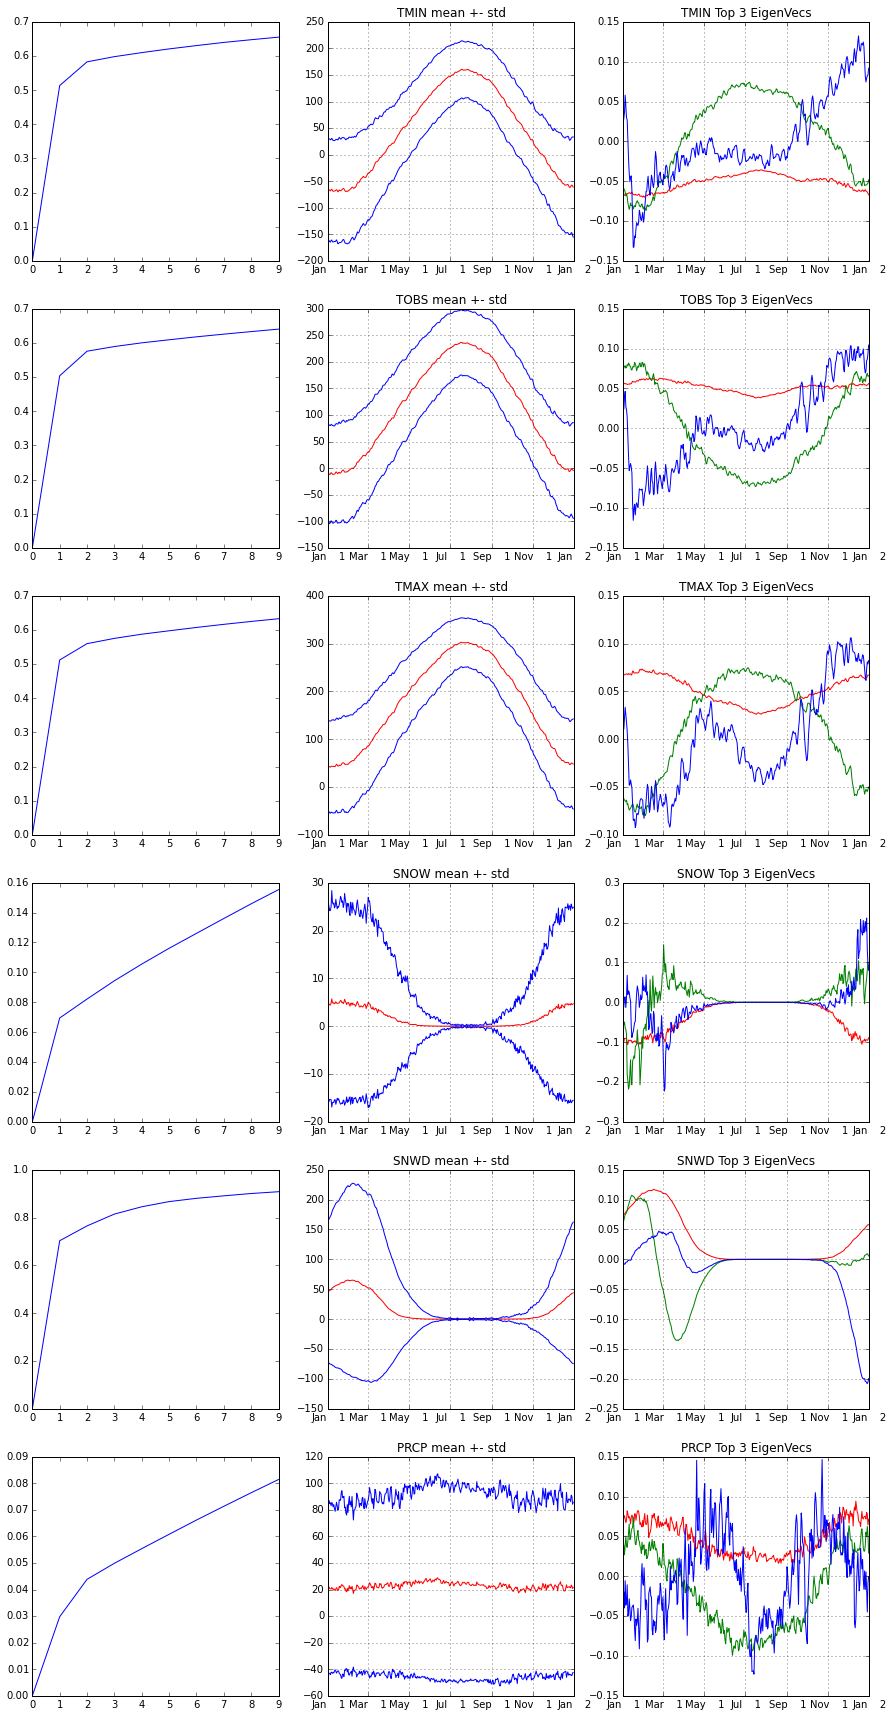

In [36]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    top_eig = STAT[meas]['eigval'][:9]
    tot_var = np.sum(STAT[meas]['Var'])
    per_var = np.cumsum(np.append([0],top_eig/tot_var))
    plt.plot(per_var)
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    T1=STAT[meas]['Mean']
    std=np.sqrt(STAT[meas]['Var'])
    YearlyPlots(T1, x=(1,366), c='r')
    YearlyPlots(T1+ std,c='b')
    YearlyPlots(T1 - std,meas + " mean +- std",c='b')
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    EV = STAT[meas]['eigvec']
    YearlyPlots(EV[:,0], x=(1,366),c='r')
    YearlyPlots(EV[:,1],c='g')
    YearlyPlots(EV[:,2],meas + " Top 3 EigenVecs",c='b')
    